In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [652]:
df = pd.read_csv('titanic.csv')
df = df[['Survived','Pclass','Sex','Age','Fare']]
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [653]:
y = df['Survived']
x = df.drop('Survived',axis='columns')


In [654]:
from sklearn.preprocessing import LabelEncoder
sex = LabelEncoder()

x['Sex'] = sex.fit_transform(x['Sex'])
x


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [655]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [656]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [657]:
model.score(x_test,y_test)

0.7985074626865671

In [658]:
yp = model.predict(x_test)

In [659]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,yp)
cf

array([[142,  18],
       [ 36,  72]])

Text(33.22222222222222, 0.5, 'Actual')

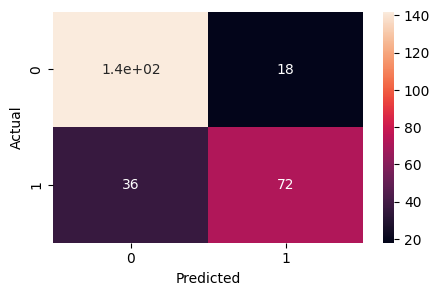

In [660]:
import seaborn as sn
plt.figure(figsize=(5,3))

sn.heatmap(cf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')